## IoU（交并比）的定义与计算

\*\*交并比（Intersection over Union, IoU）\*\*是评价目标检测和分割任务中预测结果与真实标注重叠程度的常用指标。其定义与集合论吻合：对于两个掩码对应的集合 $A$（真值）和 $B$（预测），IoU 的计算公式为

$$
\mathrm{IoU}(A,B) \;=\; \frac{|A \cap B|}{|A \cup B|},
$$

即交集区域的面积（像素数）除以并集区域的面积。直观地说，IoU 衡量了预测区域与真实区域的重合程度，范围在 0 到 1 之间：IoU 越接近 1，表示预测区域与真实区域重合度越高；IoU 越接近 0，则表示两者几乎没有重叠。

下面示例代码创建两个简单掩码，并可视化它们的交集、并集和补集区域，同时计算 IoU 值：

IoU(maskA, maskB) = 0.293


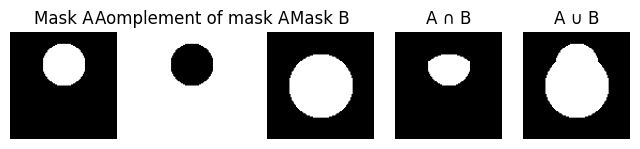

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 构造示例二值掩码（这里直接用数组生成，也可以从图像分割得到）
maskA = np.zeros((100, 100), dtype=bool)
maskB = np.zeros((100, 100), dtype=bool)
# 比如绘制两个重叠的圆形掩码
yy, xx = np.meshgrid(np.arange(100), np.arange(100))
maskA[(xx-30)**2 + (yy-50)**2 < 20**2] = True  # 圆心(30,50)，半径20
maskB[(xx-50)**2 + (yy-50)**2 < 30**2] = True  # 圆心(50,50)，半径30

# 计算集合运算
intersection = maskA & maskB
union = maskA | maskB
complementA = ~maskA

# 计算 IoU
iou_value = intersection.sum() / union.sum()
print(f"IoU(maskA, maskB) = {iou_value:.3f}")

# 可视化
fig, axs = plt.subplots(1, 5, figsize=(8,2))
axs[0].imshow(maskA, cmap='gray');     axs[0].set_title('Mask A')
axs[1].imshow(complementA, cmap='gray');     axs[1].set_title('Aomplement of mask A')
axs[2].imshow(maskB, cmap='gray');     axs[2].set_title('Mask B')
axs[3].imshow(intersection, cmap='gray'); axs[3].set_title('A ∩ B')
axs[4].imshow(union, cmap='gray');      axs[4].set_title('A ∪ B')
for ax in axs:
    ax.axis('off')
plt.show()

上述代码中，我们用 NumPy 创建了两个二值掩码 `maskA`、`maskB`（分别是两个圆形区域），然后计算它们的交集和并集，并打印出 IoU 值。运行结果显示，**交集**区域（`A ∩ B`）即为两个圆形重叠的部分，**并集**区域（`A ∪ B`）是所有被任一圆形覆盖的区域，而两者面积之比就是 IoU。通过这种图形化展示，大学一年级同学能直观理解交并比的含义：IoU 本质上就是两个掩码区域重叠部分占全部覆盖区域的比例。

### 在 AI 中的应用

在目标检测、实例分割或语义分割等 AI 任务中，交并比有着重要的几何意义。它反映了模型预测区域与真实标注在空间上的重合程度。例如，在目标检测中，一个预测框只有当它与真实框的 IoU 高于阈值（如0.5）时，才被算作正确识别。在语义分割中，像素级的 IoU（Jaccard 指数）衡量预测的分割掩码与真实掩码的一致程度。较高的 IoU 表明模型在精确定位目标和分割边界上更为准确；反之，较低的 IoU 可能意味着错位或形变较大。